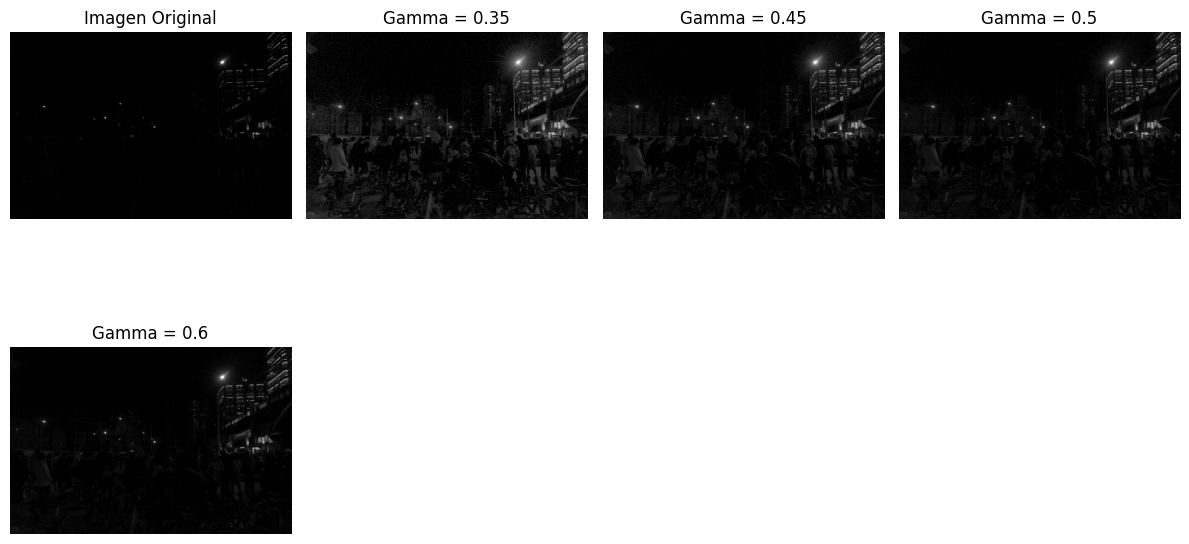

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Leer imagen nocturna
gray_img = cv2.imread('Imagen4_original.png', cv2.IMREAD_GRAYSCALE)


# Lista de valores gamma
#gamma_values = [0.25, 0.5, 1, 2, 5, 10, 20]
gamma_values = [0.35,0.45, 0.50, 0.6]
# Crear una figura para las imágenes
plt.figure(figsize=(12, 7))

# Agregar la imagen original como la primera
plt.subplot(2, 4, 1)
plt.title("Imagen Original")
plt.imshow(gray_img, cmap='gray')
plt.axis('off')

# Normalizar al rango [0, 1]
normalized_img = gray_img / 255.0
img_gammas = []
# Generar y mostrar las imágenes transformadas
for i, gamma in enumerate(gamma_values, start=2):
    # Normalización y transformación gamma
    c = 255
    img_gamma = c*np.power(normalized_img, gamma) # Aplicar transformación gamma

    # Mostrar la imagen transformada
    plt.subplot(2, 4, i)
    plt.title(f"Gamma = {gamma}")
    plt.imshow(img_gamma, cmap='gray')
    img_gammas.append(img_gamma)
    filename = f"imagen4_gamma_{gamma}.png"
    cv2.imwrite(filename, img_gamma)
    plt.axis('off')

# Ajustar diseño y mostrar la cuadrícula
plt.tight_layout()
plt.show()


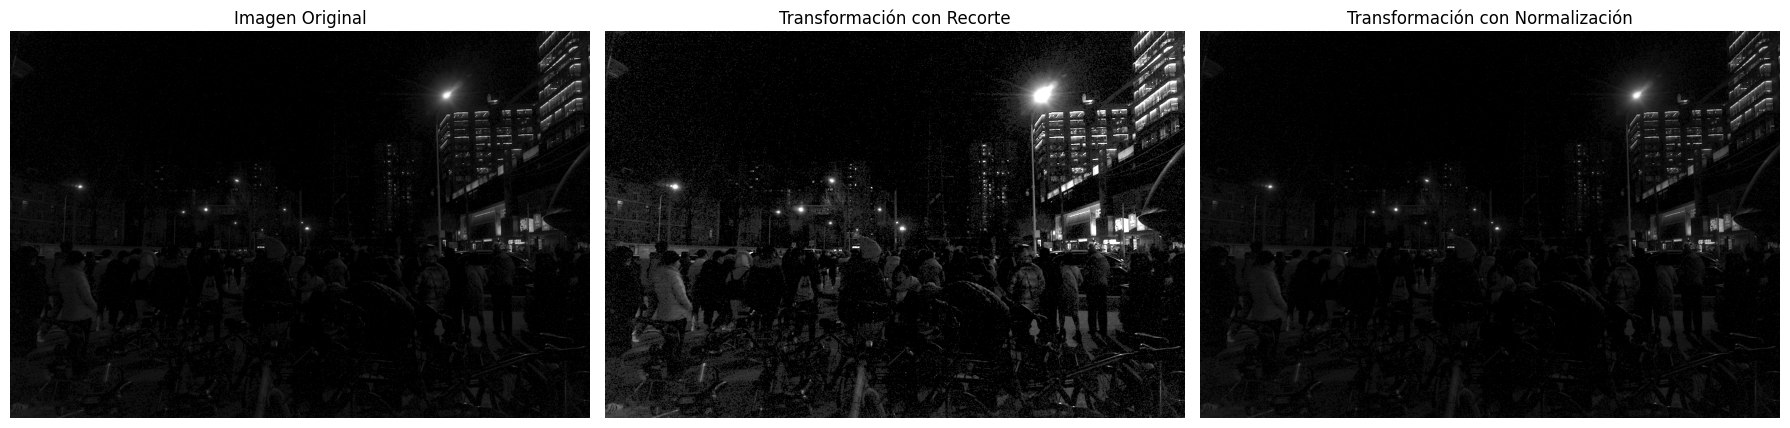

Pixel Imagen Original: 0
Pixel Imagen con Recorte: 0
Pixel Imagen con Normalización: 0


In [2]:
# Leer imagen nocturna
image = cv2.imread("imagen4_gamma_0.5.png", cv2.IMREAD_UNCHANGED)

# Verificar si la imagen es en escala de grises o color
if len(image.shape) == 2:  # Solo tiene ancho y alto, es escala de grises
    is_grayscale = True
    image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  # Convertir a RGB para visualización
else:
    is_grayscale = False
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para visualización


 # Definir el factor de escala
factor = 2.5  # Cambia este valor para aumentar o disminuir el brillo (Ejemplo: 0.8 para reducir)

# 1. Transformación con recorte (np.clip)
if is_grayscale:
    image_clipped = np.clip(image * factor, 0, 255).astype(np.uint8)
    clipped_rgb = cv2.cvtColor(image_clipped, cv2.COLOR_GRAY2RGB)  # Para visualizar
else:
    image_clipped = np.clip(image * factor, 0, 255).astype(np.uint8)
    clipped_rgb = cv2.cvtColor(image_clipped, cv2.COLOR_BGR2RGB)

 # 2. Transformación con normalización
if is_grayscale:
    normalized = ((image * factor - np.min(image * factor)) / (np.max(image * factor) - np.min(image * factor)) * 255).astype(np.uint8)
    normalized_rgb = cv2.cvtColor(normalized, cv2.COLOR_GRAY2RGB)  # Para visualizar
else:
    normalized = ((image * factor - np.min(image * factor)) / (np.max(image * factor) - np.min(image * factor)) * 255).astype(np.uint8)
    normalized_rgb = cv2.cvtColor(normalized, cv2.COLOR_BGR2RGB)

 # Mostrar las imágenes lado a lado
plt.figure(figsize=(18, 6))

# Imagen original
plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(image_rgb)
plt.axis("off")

# Imagen con recorte
plt.subplot(1, 3, 2)
plt.title("Transformación con Recorte")
plt.imshow(clipped_rgb)
plt.axis("off");
cv2.imwrite("imagen4_multi.png", clipped_rgb)
# Imagen con normalización
plt.subplot(1, 3, 3)
plt.title("Transformación con Normalización")
plt.imshow(normalized_rgb)
plt.axis("off")

plt.tight_layout()
plt.show()

#pintar mismo pixel en las 3 imagenes
fila, columna = 400, 700
print(f'Pixel Imagen Original: {image[fila, columna]}')
print(f'Pixel Imagen con Recorte: {image_clipped[fila, columna]}')
print(f'Pixel Imagen con Normalización: {normalized[fila, columna]}')

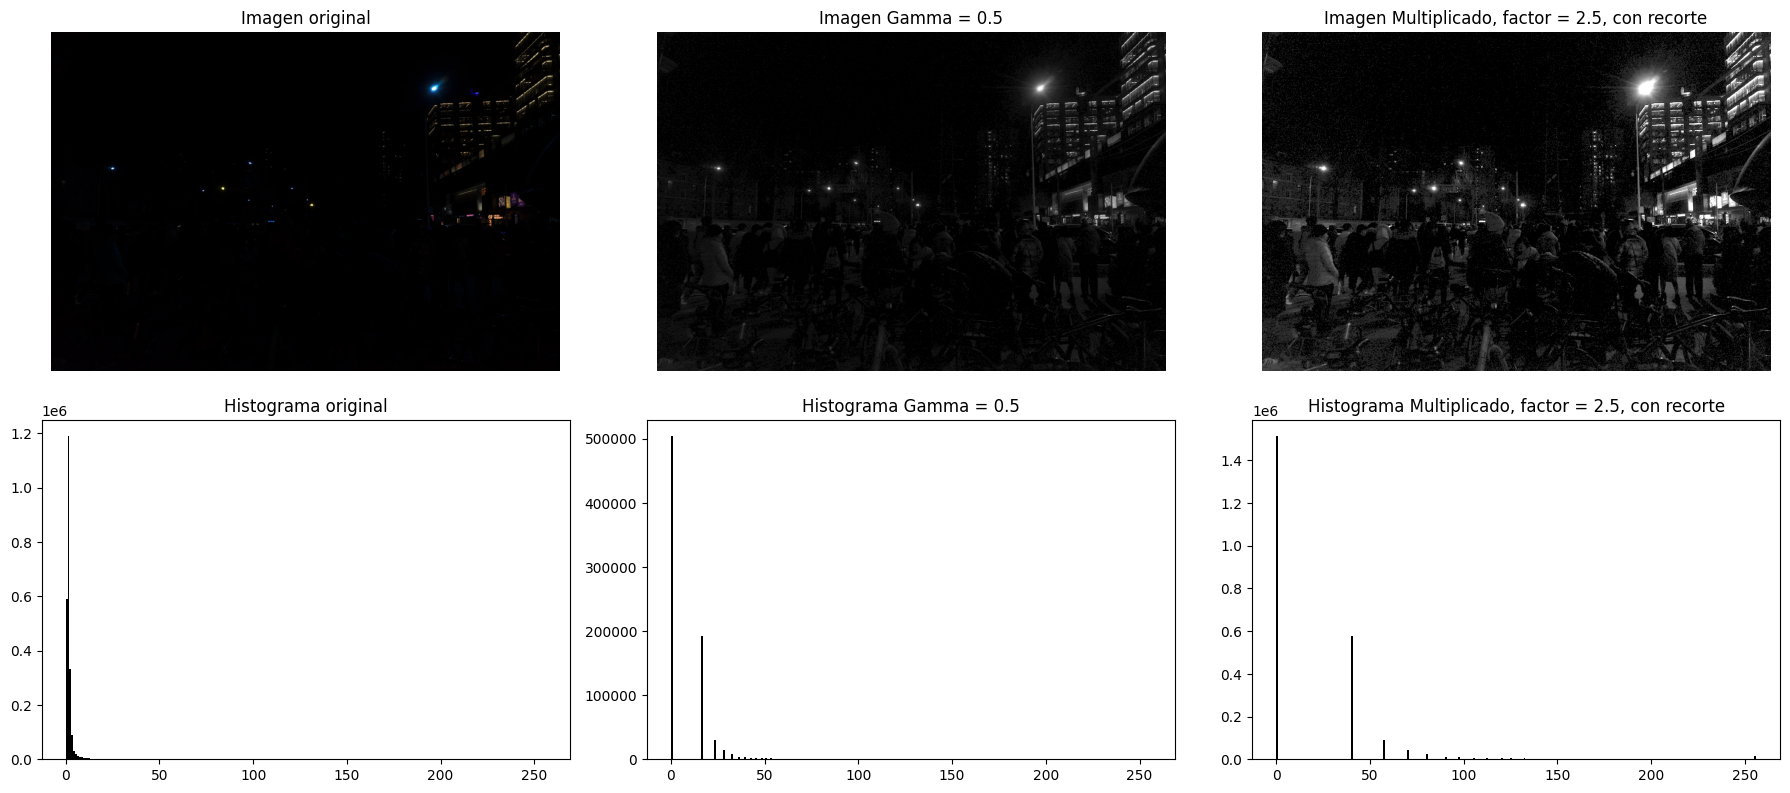

In [15]:
# Cargar imagen
image_original = cv2.imread("Imagen4_original.png", cv2.COLOR_BGR2RGB)
image_gamma = cv2.imread("imagen4_gamma_0.5.png", cv2.COLOR_BGR2RGB)
image_multi = cv2.imread("imagen4_multi.png",cv2.COLOR_BGR2RGB)
image_multi_rgb = cv2.cvtColor(image_multi, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18, 8))
# Imagen original
plt.subplot(2, 3, 1)
plt.imshow(image_original)
plt.title("Imagen original")
plt.axis("off")
plt.subplot(2, 3, 4)
plt.title("Histograma original")
plt.hist(image_original.ravel(), bins=256, range=(0, 256), color='black')
# Imagen multi
plt.subplot(2, 3, 2)
plt.imshow(image_gamma, cmap="gray")
plt.title("Imagen Gamma = 0.5")
plt.axis("off")
plt.subplot(2, 3, 5)
plt.title("Histograma Gamma = 0.5")
plt.hist(image_gamma.ravel(), bins=256, range=(0, 256), color='black')
# Imagen ecualizada
plt.subplot(2, 3, 3)
plt.imshow(image_multi, cmap="gray")
plt.title("Imagen Multiplicado, factor = 2.5, con recorte")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.title("Histograma Multiplicado, factor = 2.5, con recorte")
plt.hist(image_multi.ravel(), bins=256, range=(0, 256), color='black')
# Imagen ecualizada
plt.tight_layout()
plt.show()

#1
plt.figure()
plt.imshow(image_original)
plt.title("Imagen original")
plt.axis("off")
plt.savefig("resultado2_original.png")
plt.close()

#2
plt.figure()
plt.imshow(image_gamma)
plt.title("Imagen Gamma = 0.5")
plt.axis("off")
plt.savefig("resultado2_gamma.png")
plt.close()

#3
plt.figure()
plt.imshow(image_multi)
plt.title("Imagen Multiplicado, factor = 2.5, con recorte")
plt.axis("off")
plt.savefig("resultado2_multi.png")
plt.close()

#4
plt.figure()
plt.hist(image_original.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histograma original")
plt.xlabel("Intensidad")
plt.ylabel("Pixeles")
plt.savefig("histograma2_original.png")
plt.close()

#5
plt.figure()
plt.hist(image_gamma.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histograma Gamma = 0.5")
plt.xlabel("Intensidad")
plt.ylabel("Pixeles")
plt.savefig("histograma2_gamma.png")
plt.close()

#6
plt.figure()
plt.hist(image_multi.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histograma Multiplicado, factor = 2.5, con recorte")
plt.xlabel("Intensidad")
plt.ylabel("Pixeles")
plt.savefig("histograma2_Mult.png")
plt.close()



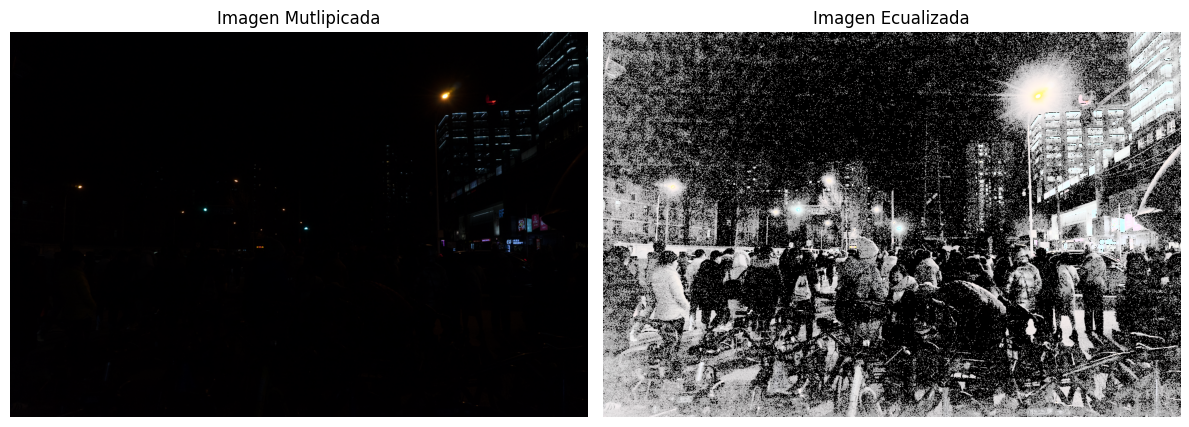

In [7]:
image = cv2.imread("Imagen4_original.png", cv2.IMREAD_UNCHANGED)

# Convertir al espacio YUV
yuv_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)

# Ecualizar el canal de luminosidad (Y)
yuv_image[:, :, 0] = cv2.equalizeHist(yuv_image[:, :, 0])

# Convertir de vuelta al espacio BGR
result = cv2.cvtColor(yuv_image, cv2.COLOR_YUV2BGR)

# Convertir el resultado al formato RGB para matplotlib
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Mostrar la imagen original y la ecualizada
plt.figure(figsize=(12, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Imagen Mutlipicada")
plt.axis("off")

# Imagen ecualizada
plt.subplot(1, 2, 2)
plt.imshow(result_rgb)
plt.title("Imagen Ecualizada")
cv2.imwrite("imagen4_ecualizada.png", result_rgb)
plt.axis("off")

plt.tight_layout()
plt.show()

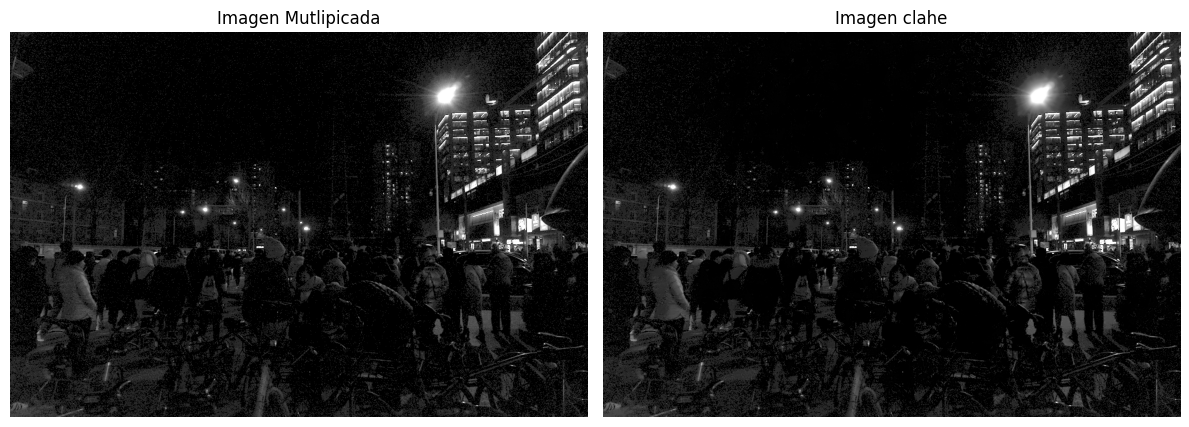

In [8]:
# Leer la imagen y convertirla a escala de grises
I_gray_log = cv2.imread('imagen4_multi.png', cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se cargó correctamente
if I_gray_log is None:
    print("Error: No se pudo cargar la imagen 'Imagen2_logaritmica.png'. Por favor, verifica la ruta y el nombre del archivo.")
else:
    # 2. Crear un objeto CLAHE y aplicar
    clahe = cv2.createCLAHE(clipLimit=1.8, tileGridSize=(8, 8))
    img_clahe = clahe.apply(I_gray_log)
    # Use cv2.fastNlMeansDenoising for grayscale images
    img_clahe = cv2.fastNlMeansDenoising(img_clahe, h=6, templateWindowSize=7, searchWindowSize=21)
    # Mostrar la imagen original y la ecualizada
    plt.figure(figsize=(12, 6))

    # Imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(I_gray_log,cmap="gray")
    plt.title("Imagen Mutlipicada")
    plt.axis("off")

    # Imagen ecualizada
    plt.subplot(1, 2, 2)
    plt.imshow(img_clahe, cmap="gray") # Added cmap="gray" for consistent display
    plt.title("Imagen clahe")
    cv2.imwrite("Imagen2_logaritmica_clahe.png", img_clahe)
    plt.axis("off")

    plt.tight_layout()
    plt.show()

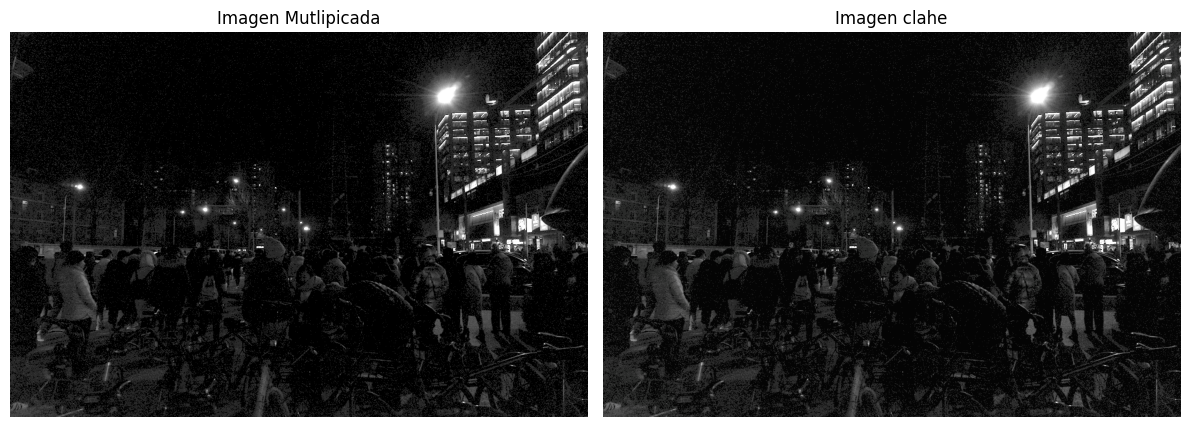

In [9]:
img = cv2.imread('imagen4_multi.png')
# Convertir a espacio de color LAB
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Separar canales
l, a, b = cv2.split(lab)

# Crear CLAHE
clahe = cv2.createCLAHE(
    clipLimit=2.5,
    tileGridSize=(8, 8)
)

# Aplicar CLAHE al canal L
l_clahe = clahe.apply(l)

# Unir canales y convertir a BGR
lab_clahe = cv2.merge((l_clahe, a, b))
resultado = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

# Guardar o mostrar resultado
cv2.imwrite("resultado_clahe.png", resultado)
# Mostrar la imagen original y la ecualizada
plt.figure(figsize=(12, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(img,cmap="gray")
plt.title("Imagen Mutlipicada")
plt.axis("off")

# Imagen ecualizada
plt.subplot(1, 2, 2)
plt.imshow(resultado, cmap="gray") # Added cmap="gray" for consistent display
plt.title("Imagen clahe")

plt.axis("off")

plt.tight_layout()
plt.show()
